# Beyond Counting Individual Words: N-grams


So far in our journey through text data processing, we've dealt with counting individual words. While this approach, often referred to as a "bag of words" model, can provide a basic level of understanding and can be useful for certain tasks, it often falls short in capturing the true complexity and richness of language. This is mainly because it treats each word independently and ignores the context and order of words, which are fundamental to human language comprehension.

For example, consider the two phrases  
*"The movie is good, but the actor was bad."*  
and  
*"The movie is bad, but the actor was good."*  

If we simply count individual words, both phrases are identical because they contain the exact same words!
However, their meanings are diametrically opposed. The order of words and the context in which they are used are important.

## N-grams

**N-grams** are continuous sequences of n items in a given sample of text or speech. In the context of text analysis, an item can be a character, a syllable, or a word, although words are the most commonly used items. The integer *n* in "n-gram" refers to the number of items in the sequence, so a bigram (or 2-gram) is a sequence of two words, a trigram (3-gram) is a sequence of three words, and so on.

To illustrate, consider the two sentences above.
With 3-grams we could also get the pieces "movie is good", "movie is bad", "actor was bad", and "actor was good".
Bigrams (or 2-grams) would not catch those differences. But they can also be very helpful in cases such as "don't like" vs "do like".

Now we will see how we can make use of such n-grams.

## N-grams in TF-IDF Vectors

When creating TF-IDF vectors, we can incorporate the concept of n-grams. The scikit-learn `TfidfVectorizer` provides the `ngram_range` parameter that allows us to specify the range of n-grams to include in the feature vectors.

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.feature_extraction.text import TfidfVectorizer

## Dataset
https://zenodo.org/record/6583422

In [2]:
filename = "data/Madrid_reviews_ratings_subset.csv"
data = pd.read_csv(filename)
data.head()

,review_full,review_preview,rating_review,title_review,date
0,"The menu of Yakuza is a bit of a lottery, some...","The menu of Yakuza is a bit of a lottery, some...",4,Good sushi option,"December 10, 2019"
1,Check your bill when you cancel just in case y...,Check your bill when you cancel just in case y...,1,Light up your table at night,"August 23, 2020"
2,I had the yuca profiteroles and the veggie bur...,I had the yuca profiteroles and the veggie bur...,5,Delicious,"March 6, 2020"
3,A friend recommended this place as one of the ...,A friend recommended this place as one of the ...,5,Loved this place,"September 29, 2020"
4,Amazing terrace in madrid - great atmosphere a...,Amazing terrace in madrid - great atmosphere a...,5,Amazing terrace in madrid,"July 27, 2020"


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   review_full     20000 non-null  object
 1   review_preview  20000 non-null  object
 2   rating_review   20000 non-null  int64 
 3   title_review    20000 non-null  object
 4   date            20000 non-null  object
dtypes: int64(1), object(4)
memory usage: 781.4+ KB


In [4]:
data.describe()

,rating_review
count,20000.000000
mean,4.674650
std,0.747279
min,1.000000
25%,5.000000
50%,5.000000
75%,5.000000
max,5.000000


<AxesSubplot: >

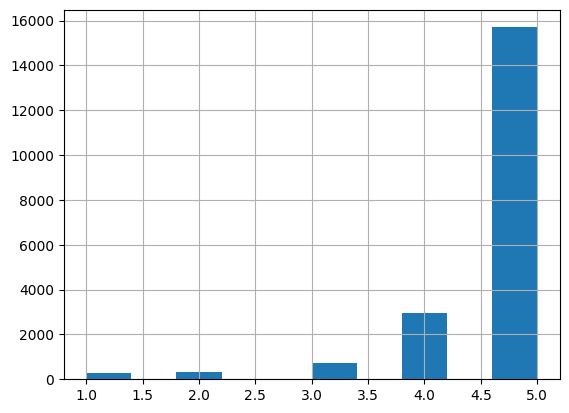

In [5]:
data.rating_review.hist()

## Find similar documents with tfidf
So far, we used the tfidf-vectors as feature vectors to train machine learning models. As we just saw, this works very well to predict review rating or to classify documents as positive/negative (=sentiment analysis).

But there is more we can do with tfidf vectors.
Why not use the vectors to compute distances or similarities? This way, we can search for the most similar documents in a corpus!

In [30]:
vectorizer = TfidfVectorizer(min_df=5,
                             max_df=0.2,
                             max_features=50000,
                             ngram_range=(1,3))  
tfidf_vectors = vectorizer.fit_transform(data["review_full"])
tfidf_vectors.shape

(20000, 50000)

In [31]:
list(vectorizer.stop_words_)[-100:]

['we paid stand',
 'and had tomato',
 'lumbini tandoori family',
 'went as adults',
 'bar outstanding',
 'out so mu',
 'tuna tataki ceviche',
 'and quite evening',
 'stick and',
 'did tables',
 'called ahead to',
 'aside we were',
 'it becomes impossible',
 'inexpensive the pizza',
 'biscotti is amazing',
 'breakfast will be',
 'together with sound',
 'so easily',
 'ceviche service is',
 'on my 1st',
 'off chance',
 'so informal',
 '1900 magically transformed',
 'the managment',
 'there may have',
 '160g and',
 'also which',
 'after booking through',
 'ingredients if',
 'iberica jamon',
 'traveling 10 days',
 'of tapas followed',
 'than the actual',
 'brief stay',
 'dancers staff',
 'incredible tuna',
 'not remember the',
 'minutes making the',
 'gets if you',
 'very refreshing of',
 'find potatoes as',
 'stop the running',
 'the best last',
 'chance check out',
 'the second with',
 'neighborhood will always',
 'splendid the dancers',
 'much dishes',
 'the 1000',
 'lucky the manager',


In [32]:
len(list(vectorizer.stop_words_))

957559

In [19]:
vectorizer.get_feature_names_out()[-100:]

array(['your face', 'your family', 'your favorite', 'your favourite',
       'your first', 'your food', 'your friends', 'your great',
       'your hospitality', 'your hotel', 'your in', 'your kindness',
       'your life', 'your liking', 'your list', 'your looking',
       'your lunch', 'your madrid', 'your meal', 'your meat', 'your mind',
       'your money', 'your mouth', 'your name', 'your needs', 'your next',
       'your order', 'your own', 'your palate', 'your pizza',
       'your place', 'your plate', 'your preference', 'your restaurant',
       'your service', 'your spanish', 'your stay', 'your steak',
       'your table', 'your taste', 'your tastes', 'your time',
       'your traditional', 'your trip', 'your typical', 'your visit',
       'your way', 'your wine', 'yourself', 'yourself and',
       'yourself favor', 'yourself favour', 'yourself in', 'yourself the',
       'yourself to', 'yourselves', 'youthful', 'yuca', 'yucca', 'yum',
       'yum and', 'yum the', 'yum we', 'yu

In [33]:
tfidf_vectors[0,:]# sparse matrix mit 85 features, der rest sind nullen

<1x50000 sparse matrix of type '<class 'numpy.float64'>'
	with 85 stored elements in Compressed Sparse Row format>

#### Compare one vector to all other vectors
Even though we here deal with very large vectors, computing similarities or angles between these vectors is compuationally very efficient. This means, we can simply compare a the tfidf vector of a given text to all > 140,000 documents in virtually no time!

In order for this to work, however, we should not rely on for-loops. Those are inherently slow in Python. We rather use optimized functions for this such as from `sklear.metrics.pairwise`.

In [58]:
from sklearn.metrics.pairwise import cosine_similarity

review_id = 0
query_vector = tfidf_vectors[review_id, :]

cosine_similarities = cosine_similarity(query_vector, tfidf_vectors).flatten() # flatten macht aus 2d array 1d array
cosine_similarities.shape

(20000,)

In [59]:
cosine_similarities[:20] #der erste mit dem ersten hat einen wert von 1, der erste mit dem 2 vector verglichen hat 0.003

array([1.        , 0.00372323, 0.00859872, 0.05740937, 0.        ,
       0.01040925, 0.        , 0.        , 0.00655696, 0.        ,
       0.01824534, 0.00345502, 0.        , 0.02712874, 0.00847378,
       0.01202291, 0.02114161, 0.01334333, 0.01672691, 0.05737311])

In [60]:
top5_idx = cosine_similarities.argsort()[::-1][1:6] #argsort gibt die indizes zurück, die sortiert sind
top5_idx

array([12603, 12617, 12596,   230, 12621], dtype=int64)

Let us now look at the results of our search by displaying the top-5 most similar documents (according to the cosine score on the tfidf-vectors). This usually doesn't work perfectly, but it does work to quite some extent. Try it out yourself and have a look at what documents this finds for you!

In [71]:
print("\n****Original document:****")
print(data.iloc[review_id,0])

for i in top5_idx:
    print(f"\n----Document with similarity {cosine_similarities[i]:.3f}:----")
    print(data.iloc[i,0])


****Original document:****
The menu of Yakuza is a bit of a lottery, some plates are really good (like most of the sushi rolls) and instead some others are terrible ( the pizza sushi and most of the fried starters). Taking this in consideration, it´s a great option if you feel like sushi and can avoid ordering from the rest of the menu. We even ordered for delivery more than once and the packaging they use is great.

----Document with similarity 0.218:----
Very sweet atmosphere. Good service but the sushi was glorified . We eaten a same rolls in every sushi corner !!!!

----Document with similarity 0.152:----
The place is more for locals than for tourists, as it is not on the busiest and most prominent street of Madrid. Good sushi and snacks. I liked the friendly and cheerful waiters !

----Document with similarity 0.135:----
One of the best sushi I ever eat. Grate service! Nice atmosphere. I asked for rekommendation and get very good mix of different sushi pieces! All of them ware so

# Word Vectors: Word2Vec and Co
**Tfidf vectors** are a rather basic, but still often used, technique. Arguably, this is because they are based on relatively simple statistics and easy to compute. They typically do a good job in weighing words according to their importance in a larger corpus and allow us to ignore words with low *distriminative power* (for instance so-called *stopwords* such as "a", "the", "that", ...).

With **n-grams** we can even go one step further and also count sentence pieces longer than one word, which allows to also take some grammar or negations into account. The price, however, is that we have to restrict the number of n-grams to avoid exploding vector sizes.

While TF-IDF vectors and n-grams serve as powerful techniques to represent and manipulate text data, they have limitations. These methods essentially treat words as individual, isolated units, devoid of any context or relation to other words. In other words, they lack the ability to capture the semantic meanings of words and the linguistic context in which they are used.

Take these two sentences as an example:

(1) *The customer likes cake with a cappuccino.*  
(2) *The client loves to have a cookie and a coffee.*

We will immediately indentify that both sentences speak of very similar things. But if you look at the words in both sentences you will realize that only *"The"* and *"a"* are found in both. And, as we have seen in the tfidf-part, such words tell very little about the sentence content. All other words, however, only occur in one or the other sentence. Tfidf-vectors would compute a zero similarity here.

This is where we come to **word vectors**. Word vectors, also known as **word embeddings**, are mathematical representations of words in a high-dimensional space where the semantic similarity between words corresponds to the geometric distance in the embedding space. Simply put, similar words are close together, and dissimilar words are farther apart. If done well, this should show that *"cookie"* and *"cake"* are not the same word, but mean something very related.

The most prominent example of such a technique is Word2Vec {cite}`mikolov_distributed_2013`{cite}`mikolov_efficient_2013`.


## Alternative short-cuts
Training your own Word2Vec model is fun and sometimes also really helpful. Here it is quite OK for instance, because we have a relatively big text corpus (> 140,000 documents) with a clear general topic focus on restaurants and food.

Often, however, you simply may want to use a model that covers a language more broadly. Instead of training your own model on a much much bigger corpus, we can simply use a model that was trained already, see for instance here [on the Gensim website](https://radimrehurek.com/gensim/models/word2vec.html#usage-examples).

Another way is to use **SpaCy**. Its larger language models already contain word embeddings!

In [ ]:
# Comment out and run the following to first download a large english model
#!python -m spacy download en_core_web_lg

In [72]:
import spacy

nlp = spacy.load("en_core_web_lg")

As we have seen before, SpaCy converts the text into tokens, but also does much more. We can look at different attributes of the tokens to extract the computed information. For instance:

- `.text`: The original token text.
- `has_vector`: Does the token have a vector representation?
- `.vector_norm`: The L2 norm of the token’s vector (the square root of the sum of the values squared)
- `.is_oov`: Out-of-vocabulary


In [73]:
tokens = nlp("dog cat banana afskfsd")
for token in tokens:
    print(token.text, token.has_vector, token.vector_norm, token.is_oov)

dog True 75.254234 False
cat True 63.188496 False
banana True 31.620354 False
afskfsd False 0.0 True


In [77]:
tokens[0].vector.shape

(300,)

In [80]:
sentence = nlp("I like to study data science") # einzelne wörter werden zu einem vektor (jeder wortvektor wird addiert, I + like + to + study + data + science)
sentence.vector #shape 300 Dimensionen

array([ 0.44906327,  2.2340333 , -1.3325001 , -2.752285  , -2.2717967 ,
       -0.70475096,  1.8312835 ,  5.879667  , -5.26411   ,  0.9488716 ,
        7.4923    ,  3.8269918 , -4.5402865 ,  0.9320666 ,  0.45495   ,
       -0.53907657,  4.467097  , -5.069228  , -6.801515  , -4.7121005 ,
        0.7438367 ,  0.19060834, -2.1157548 , -3.402633  , -2.48992   ,
       -3.7325547 , -3.0563965 ,  1.917355  , -2.8699772 ,  3.0504398 ,
        0.55665   , -1.9339914 , -1.7441667 ,  0.7751722 ,  0.07775887,
       -3.1789534 , -0.83820343, -2.2033634 ,  2.9369164 ,  3.7390482 ,
       -0.12279835,  1.6794952 ,  0.7968766 , -0.48954985, -1.7621336 ,
        2.9575965 ,  2.2403505 , -3.6989002 , -2.1294582 ,  2.4220834 ,
        0.98881674, -0.06391335, -1.3425969 , -4.776095  , -3.1199396 ,
        0.26173002, -0.93869495,  0.86469334,  5.1411967 , -2.5766835 ,
        3.9945335 , -0.06128498, -1.2907383 ,  0.6415505 ,  3.4002502 ,
        2.1730502 , -2.6134434 , -6.006567  ,  1.2251383 ,  2.47

In [81]:
sentence2 = nlp('You hate to study anything at all')
sentence.similarity(sentence2) #cosine similarity

0.8126351923686234

In [82]:
from tqdm.notebook import tqdm

document_vectors = []
for review in tqdm(data.review_preview[:5000]):
    # compute document vector and add to document_vectors
    document_vectors.append(nlp(review).vector)

  0%|          | 0/5000 [00:00<?, ?it/s]

In [84]:
document_vectors = np.array(document_vectors)
document_vectors

array([[-3.5328593 , -1.4544488 , -0.5831695 , ..., -1.7265121 ,
        -1.8914993 ,  0.5689707 ],
       [-0.00667662,  1.5234815 , -3.161151  , ...,  0.9345689 ,
        -4.5291743 ,  0.45734277],
       [-2.408662  , -0.7312647 , -2.0059705 , ..., -1.6714467 ,
        -2.6335635 ,  2.0282447 ],
       ...,
       [-1.3498837 , -0.6342271 , -2.5423038 , ..., -0.5788996 ,
        -3.3136256 ,  1.961531  ],
       [-1.5128483 ,  0.6217422 , -2.6405509 , ..., -1.2490116 ,
        -2.7139754 ,  0.86713344],
       [ 0.8475203 ,  0.09574848, -4.533299  , ...,  1.0532753 ,
        -2.9197211 ,  0.98402745]], dtype=float32)

In [88]:
from sklearn.metrics.pairwise import cosine_similarity

idx = 5
query_doc = data.review_preview[idx]
print(query_doc)

# compute similarities
similarities = cosine_similarity(document_vectors[idx, :].reshape(1, -1), document_vectors)[0]

top_5 = np.argsort(similarities)[::-1][1:6]

Adriana is very nice , friendly She is Colombian The price is superb like 13 euros for drink  soup  fish and chocolate  cake The place is  fresh The azotea group has like 4 places in Madrid nubel lovely in the museum reina Sofía . Picalagartos...


In [89]:
for idx in top_5:
    print(f"\n------ Found similarity of {similarities[idx]:.3f} ------")
    print(data.review_preview[idx])


------ Found similarity of 0.932 ------
This is a family run hole in the wall restaurant.  The service is extremely friendly. The food is good (but not great). We had the avocado tartar which was made with hard avocadoes. Most everything is fried. The place is over Tripadvised. Number 3 in...

------ Found similarity of 0.929 ------
Although this restaurant is a little tucked away in a suburb of Madrid it is well worth searching out.  It is small and very popular, so booking is recommended.  The food is excellent, being based on what is fresh in the market at the time,...

------ Found similarity of 0.926 ------
I had lunch here on a quiet weekday afternoon and everything is perfect. The decor and atmosphere is very nice, the offerings are Italian pasta, pizza and salads. This is 2 min walk from Reina Sofia museum and is highly recommended

------ Found similarity of 0.924 ------
This restaurant is good but quite overrated here.  Madrid has nearly 10,000 restaurants in the area, this 

In [90]:
from sklearn.manifold import TSNE

tsne = TSNE()
tsne_vectors = tsne.fit_transform(document_vectors)

c:\Users\Phili\anaconda3\envs\chatbots\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\Phili\anaconda3\envs\chatbots\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [92]:

test = { 
    'x_coord' : tsne_vectors[:, 0], 
    'y_coord' : tsne_vectors[:, 1]
}

tsne_df = pd.DataFrame(test)
tsne_df["title"] = data.title_review[:5000]
tsne_df["preview"] = data.review_preview[:5000]
tsne_df["rating"] = data.rating_review.values[:5000]
tsne_df.head()

,x_coord,y_coord,title,preview,rating
0,-19.957804,50.178471,Good sushi option,"The menu of Yakuza is a bit of a lottery, some...",4
1,18.756088,-48.699444,Light up your table at night,Check your bill when you cancel just in case y...,1
2,-17.605927,11.364086,Delicious,I had the yuca profiteroles and the veggie bur...,5
3,21.364323,-14.942403,Loved this place,A friend recommended this place as one of the ...,5
4,-1.163100,33.803192,Amazing terrace in madrid,Amazing terrace in madrid - great atmosphere a...,5


In [94]:
#!pip install plotly

     -------------------------------------- 15.5/15.5 MB 154.3 kB/s eta 0:00:00


In [95]:
import plotly.express as px

df = px.data.iris()

features = df.loc[:, :'petal_width']

fig = px.scatter(
    tsne_df, x="x_coord", y="y_coord",
    color=tsne_df.rating, labels={'color': 'species'},
    hover_data=["title"]
)
fig.show()

### Limitations and Extensions

While Word2Vec is a powerful tool, it's not without limitations. The main issue with Word2Vec (and similar models that derive their semantics based on the local usage context) is that they assign one vector per word. This becomes a problem for words with multiple meanings based on their context (homonyms and polysemes). To tackle such limitations, extensions like FastText and advanced methods such as GloVe (Global Vectors for Word Representation) and transformers like BERT (Bidirectional Encoder Representations from Transformers) have been proposed.

### FastText

FastText, also developed by Facebook, extends Word2Vec by treating each word as composed of character n-grams. So the vector for a word is made of the sum of these character n-grams. This allows the embeddings to capture the meaning of shorter words and suffixes/prefixes and understand new words once the character n-grams are learned.

### GloVe

GloVe, developed by Stanford, is another method to create word embeddings. While Word2Vec is a predictive model — a model that predicts context given a word, GloVe is a count-based model. It leverages matrix factorization techniques on the word-word co-occurrence matrix.

### Transformers: BERT & GPT

BERT (Bidirectional Encoder Representations from Transformers) and GPT (Generative Pretrained Transformer) models ushered in the era of transformers that not only consider local context but also take the entire sentence context into account to create word embeddings.

In conclusion, while TF-IDF and n-grams offer a solid start, word embeddings and transformers take the representation of words to the next level. By considering context and semantic meaning, they offer a more complete and robust method to work with text